In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [2]:
#装载数据集

train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

In [3]:
# 查看部分数据

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 查看
# column data type
# column not-null count
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#有没有空值，即missing value

train_df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [6]:
def count_null( name, df):
    total_count = df.shape[0]
    NULL_count = df.shape[0] - df.count()    
    print(name, "NULL ratio:", NULL_count,"/", total_count )

count_null("Age",train_df["Age"] )
count_null("Cabin",train_df["Cabin"] )
count_null("Embarked",train_df["Embarked"] )


Age NULL ratio: 177 / 891
Cabin NULL ratio: 687 / 891
Embarked NULL ratio: 2 / 891


In [7]:
missing_values = train_df.isnull().sum(axis=0).reset_index()
missing_values.columns = ['column_name', 'missing_count']
missing_values


,column_name,missing_count
0,PassengerId,0
1,Survived,0
2,Pclass,0
3,Name,0
4,Sex,0
5,Age,177
6,SibSp,0
7,Parch,0
8,Ticket,0
9,Fare,0


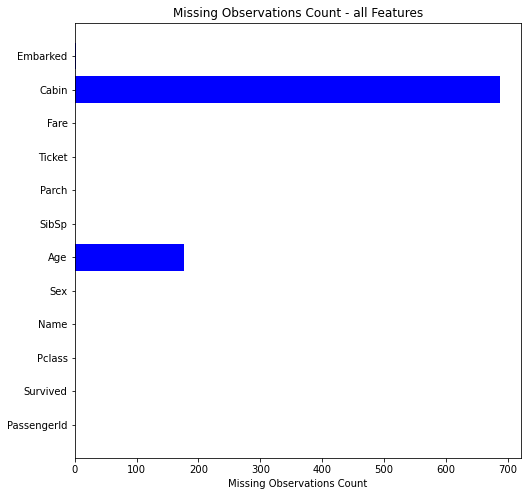

In [8]:
ind = np.arange(missing_values.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(8,8))
rects = ax.barh(ind, missing_values.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_values.column_name.values)
ax.set_xlabel("Missing Observations Count")
ax.set_title("Missing Observations Count - all Features")
plt.show()

In [9]:
def count_null( name, df):
    total_count = df.shape[0]
    NULL_count = df.shape[0] - df.count()    
    print(name, "NULL ratio:", NULL_count,"/", total_count )

count_null("Age",train_df["Age"] )
count_null("Embarked",train_df["Embarked"] )
count_null("Cabin",train_df["Cabin"] )

Age NULL ratio: 177 / 891
Embarked NULL ratio: 2 / 891
Cabin NULL ratio: 687 / 891


In [10]:
# 描述性信息（数值型数据）
# max,min, 25%, 50%(中位数), 75%
# mean, std

train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Moran, Mr. James",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [12]:
#distinct values

print("Survived distinct values", train_df['Survived'].nunique())
print("")

print("Pclass distinct values", train_df['Pclass'].nunique())
print("Sex distinct values", train_df['Sex'].nunique())
print("SibSp distinct values", train_df['SibSp'].nunique())
print("Embarked distinct values", train_df['Embarked'].nunique())
print("Parch distinct values", train_df['Parch'].nunique())
print("")
print("Age distinct values", train_df['Age'].nunique())
print("Ticket distinct values", train_df['Ticket'].nunique())
print("Fare distinct values", train_df['Fare'].nunique())
print("Cabin distinct values", train_df['Cabin'].nunique())



Survived distinct values 2

Pclass distinct values 3
Sex distinct values 2
SibSp distinct values 7
Embarked distinct values 3
Parch distinct values 7

Age distinct values 88
Ticket distinct values 681
Fare distinct values 248
Cabin distinct values 147


In [13]:
print("Pclass", train_df['Pclass'].value_counts())
print("")
print("Sex", train_df['Sex'].value_counts())
print("")
print("SibSp", train_df['SibSp'].value_counts())
print("")
print("Embarked", train_df['Embarked'].value_counts())
print("")
print("Parch", train_df['Parch'].value_counts())
 

Pclass 3    491
1    216
2    184
Name: Pclass, dtype: int64

Sex male      577
female    314
Name: Sex, dtype: int64

SibSp 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

Embarked S    644
C    168
Q     77
Name: Embarked, dtype: int64

Parch 0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64


In [14]:
#dummy

train_df.head()

# ticket是票根，Cabin是客舱号

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
def show_category_column( df, column_name):
    one_column = df[column_name]
    
    # row_count
    row_count = one_column.shape[0]
    print("row_count",row_count)

    # null_count
    null_count = one_column.shape[0] - one_column.count()    
    print("null_count", null_count)

    #distinct_value_count
    distinct_value_count = one_column.nunique()
    print("distinct_value_count", distinct_value_count)
    print("")
    
    print("distinct_value_list")
    print( one_column.value_counts())
    
    sns.countplot(one_column)
    plt.show()

row_count 891
null_count 0
distinct_value_count 3

distinct_value_list
3    491
1    216
2    184
Name: Pclass, dtype: int64


C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


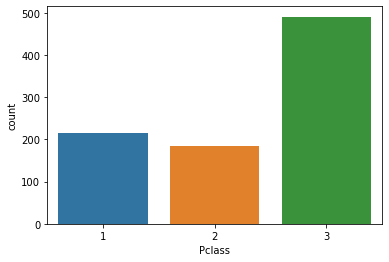

In [16]:
show_category_column(train_df, "Pclass")

row_count 891
null_count 0
distinct_value_count 2

distinct_value_list
male      577
female    314
Name: Sex, dtype: int64


C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


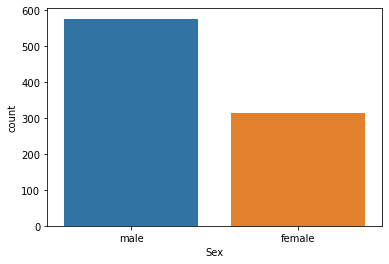

In [17]:
show_category_column(train_df, "Sex")

row_count 891
null_count 0
distinct_value_count 7

distinct_value_list
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


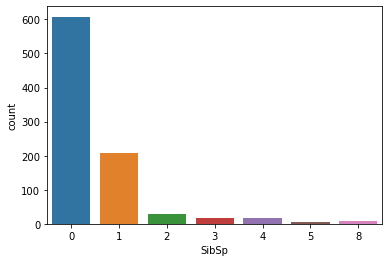

In [18]:
show_category_column(train_df, "SibSp")

row_count 891
null_count 2
distinct_value_count 3

distinct_value_list
S    644
C    168
Q     77
Name: Embarked, dtype: int64


C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


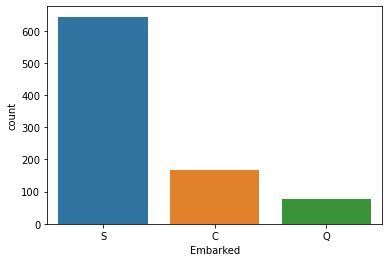

In [19]:
show_category_column(train_df, "Embarked")

row_count 891
null_count 0
distinct_value_count 7

distinct_value_list
0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64


C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


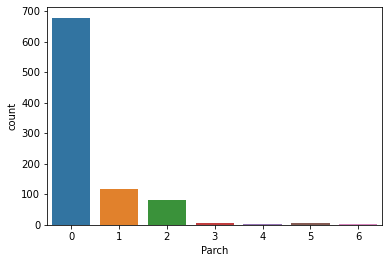

In [20]:

show_category_column(train_df, "Parch")

In [21]:
# numeric columns


In [22]:
def show_numeric_column( df, column_name):
    one_column = df.loc[:, column_name]

    print("head")
    print(one_column.head())
    print("")

    # row_count
    row_count = one_column.shape[0]
    print("row_count",row_count)

    # null_count
    null_count = one_column.shape[0] - one_column.count()    
    print("null_count", null_count)

    #distinct_value_count
    distinct_value_count = one_column.nunique()
    print("distinct_value_count", distinct_value_count)

    # distribution
    fig = plt.figure(figsize=(50,8))
    sns.distplot(one_column.dropna(), color='blue', label=column_name, ax=plt.subplot(222))
    plt.show()

    #box
    train_df.boxplot(column=[column_name],showfliers=True)
    
    plt.show()


<AxesSubplot:ylabel='Frequency'>

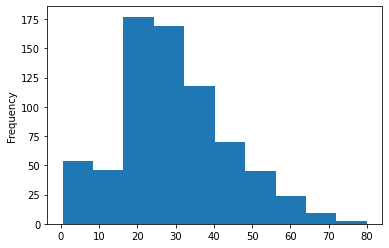

In [23]:
#add
train_df['Age'].plot(kind='hist')

head
0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

row_count 891
null_count 177
distinct_value_count 88


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


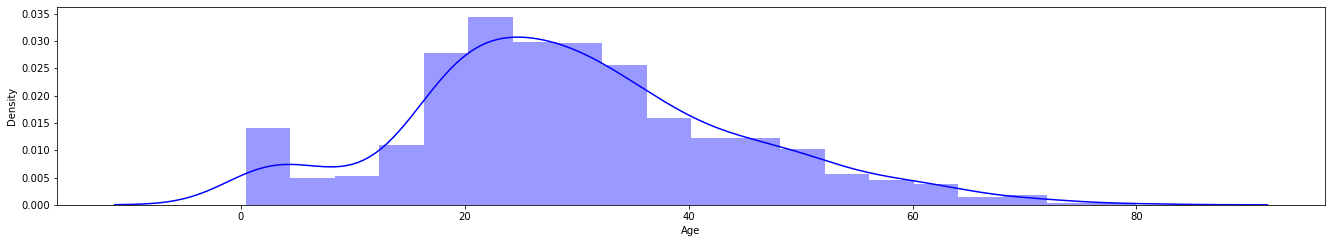

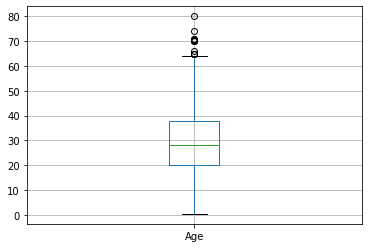

In [24]:
show_numeric_column(train_df, "Age")



head
0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64

row_count 891
null_count 0
distinct_value_count 248


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


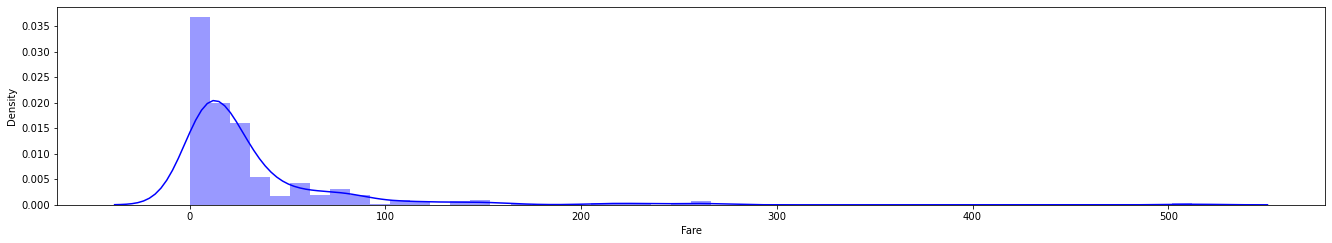

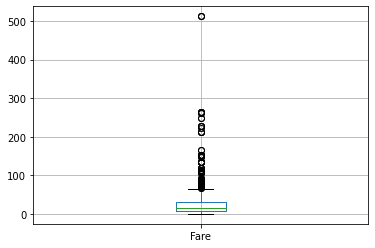

In [25]:
show_numeric_column(train_df, "Fare")

In [26]:
Q1 = train_df['Fare'].quantile(0.25)
Q3 = train_df['Fare'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
uppper = Q3 + 1.5*IQR

print("lower",lower)
print("uppper",uppper)

print("min Fare", train_df['Fare'].min())
print("max Fare", train_df['Fare'].max())



lower -26.724
uppper 65.6344
min Fare 0.0
max Fare 512.3292


In [27]:
def encode_Fare(old,uppper):
    if old <=uppper:
        return old
    else:
        return uppper

In [28]:
one_column = train_df["Fare"]
one_column = one_column.apply(encode_Fare,uppper=uppper )
train_df["Fare2"] =one_column

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,65.6344
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.0500


head
0     7.2500
1    65.6344
2     7.9250
3    53.1000
4     8.0500
Name: Fare2, dtype: float64

row_count 891
null_count 0
distinct_value_count 204


C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


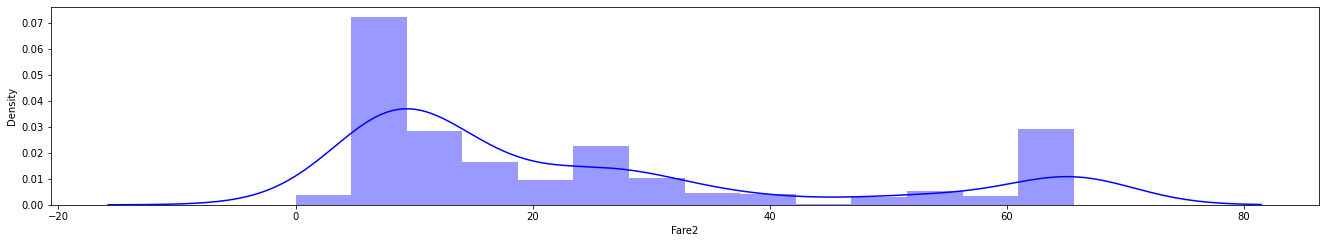

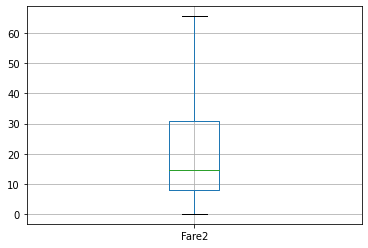

In [29]:
show_numeric_column(train_df, "Fare2")

In [30]:
#编码Sex
# ['male','female']变成[0,1]

def encode_Sex(old):
    if old == 'male':
        return 0
    elif old == 'female':
        return 1
    else:
        return old


In [31]:

one_column = train_df["Sex"]
one_column = one_column.apply(encode_Sex )
train_df["Sex2"] =one_column

train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare2,Sex2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,65.6344,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.0500,0


In [32]:
# Embarked有空值，即有missing value
# S最多，即南安普顿最多
train_df['Embarked'].fillna('S',inplace=True)

In [33]:
#编码Embarked
# ['S','C','Q']变成[0,1,2]

def encode_Embarked(old):
    if old == 'S':
        return 0
    elif old == 'C':
        return 1
    elif old == 'Q':
        return 2
    else:
        return 0

In [34]:

one_column = train_df["Embarked"]
one_column = one_column.apply(encode_Embarked )
train_df["Embarked2"] =one_column

train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare2,Sex2,Embarked2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,7.2500,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,65.6344,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.9250,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,53.1000,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.0500,0,0


In [35]:
# Age有空值，即有missing value
#数值型

age_median = train_df['Age'].median()
print("age_median",age_median)



age_median 28.0


In [36]:
#用median来填充missing age

train_df['Age'].fillna(age_median,inplace=True)

one_column = train_df['Age']
null_count = one_column.shape[0] - one_column.count()    
print("null_count", null_count)

null_count 0


In [37]:
#对年龄进行离散化，分出少年、中年、老年
#0 1 2
def encode_Age(old):
    if old < 18:
        return 0
    elif old <48:
        return 1
    else:
        return 2


In [38]:
one_column = train_df["Age"]
one_column = one_column.apply(encode_Age )
train_df["Age2"] =one_column

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare2,Sex2,Embarked2,Age2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,7.2500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,65.6344,1,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.9250,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,53.1000,1,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.0500,0,0,1


In [39]:
print("Age2", train_df['Age2'].value_counts())


Age2 1    689
0    113
2     89
Name: Age2, dtype: int64


In [40]:
# MinMaxScaler

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
one_column = min_max_scaler.fit_transform(train_df[['Age']])

train_df["Age_min_max_scale"] =one_column
train_df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare2,Sex2,Embarked2,Age2,Age_min_max_scale
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,7.2500,0,0,1,0.271174
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,65.6344,1,1,1,0.472229
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.9250,1,0,1,0.321438
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,53.1000,1,0,1,0.434531
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.0500,0,0,1,0.434531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,13.0000,0,0,1,0.334004
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,30.0000,1,0,1,0.233476
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,23.4500,1,0,1,0.346569
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,30.0000,0,1,1,0.321438


In [41]:
#StandardScaler
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
one_column = standardScaler.fit_transform(train_df[['Age']])



train_df["Age_std_scale"] =one_column
train_df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare2,Sex2,Embarked2,Age2,Age_min_max_scale,Age_std_scale
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,7.2500,0,0,1,0.271174,-0.565736
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,65.6344,1,1,1,0.472229,0.663861
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.9250,1,0,1,0.321438,-0.258337
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,53.1000,1,0,1,0.434531,0.433312
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.0500,0,0,1,0.434531,0.433312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,13.0000,0,0,1,0.334004,-0.181487
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,30.0000,1,0,1,0.233476,-0.796286
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,23.4500,1,0,1,0.346569,-0.104637
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,30.0000,0,1,1,0.321438,-0.258337


In [42]:
df_mini = train_df["Age"]
df_normalized=(df_mini-df_mini.mean())/df_mini.std()
df_normalized

0     -0.565419
1      0.663488
2     -0.258192
3      0.433068
4      0.433068
         ...   
886   -0.181385
887   -0.795839
888   -0.104579
889   -0.258192
890    0.202648
Name: Age, Length: 891, dtype: float64

In [43]:
# category 变量与目标变量


In [44]:
#test
list1 = [1,2,3,np.nan]
list1 =[ 0 if np.isnan(i) else i for i in list1]
print (list1)

[1, 2, 3, 0]


In [45]:
def category_plot( column, train_data):
    fig = plt.figure(figsize=(12,6)) # Figure initiation
    
    # Number of occurrences per categoty - target pair
    ax = sns.countplot(x=column, hue="target_name", data=train_data, ax = plt.subplot(111));
    # X-axis Label
    plt.xlabel(column, fontsize=14);
    # Y-axis Label
    plt.ylabel('Number of occurrences', fontsize=14);
    # Adding Super Title (One for a whole figure)
    plt.suptitle('Plots for '+column, fontsize=18);
    # Setting Legend location 
    plt.legend(loc=1);
    
    # Adding percents over bars
    # Getting heights of our bars
    height = [p.get_height() for p in ax.patches]
    height =[ 0 if np.isnan(i) else i for i in height]
    #print("height",height)
    # Counting number of bar groups 
    ncol = int(len(height)/2)
    
    # Counting total height of groups
    total = [height[i] + height[i + ncol] for i in range(ncol)] * 2
    total =[ 0 if np.isnan(i) else i for i in total]
    #print("total",total)
    
   # Looping through bars
    for i, p in enumerate(ax.patches):    
        # Adding percentages
        pos_x = p.get_x()+p.get_width()/2
        pos_y = height[i]*1.01 + 10
        #print("pos_x", pos_x)
        #print("pos_y", pos_y)
        ax.text( pos_x, pos_y,
                '{:1.0%}'.format(height[i]/total[i]), ha="center", size=14) 
    plt.show()

In [46]:
train_df['target_name'] = train_df['Survived'].map({0: 'Not Survived', 1: 'Survived'})
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare2,Sex2,Embarked2,Age2,Age_min_max_scale,Age_std_scale,target_name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,7.2500,0,0,1,0.271174,-0.565736,Not Survived
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,65.6344,1,1,1,0.472229,0.663861,Survived
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.9250,1,0,1,0.321438,-0.258337,Survived
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,53.1000,1,0,1,0.434531,0.433312,Survived
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.0500,0,0,1,0.434531,0.433312,Not Survived


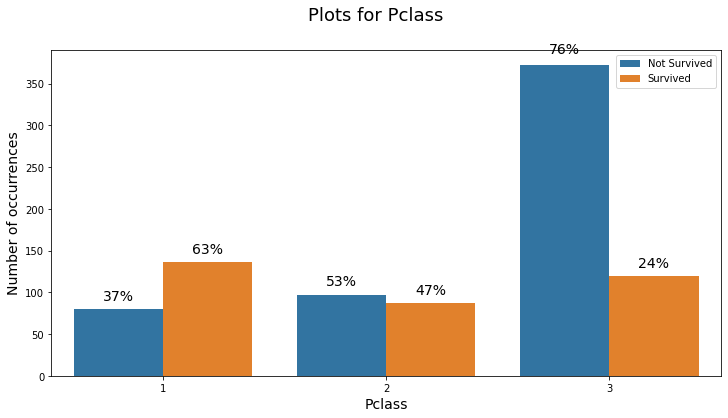

In [47]:
category_plot("Pclass", train_df)


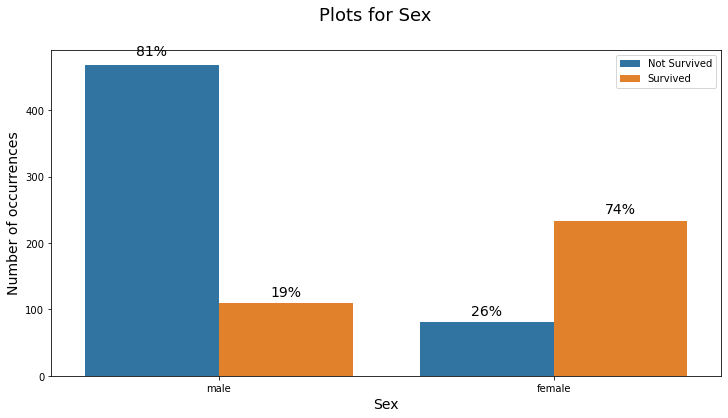

In [48]:
category_plot("Sex", train_df)

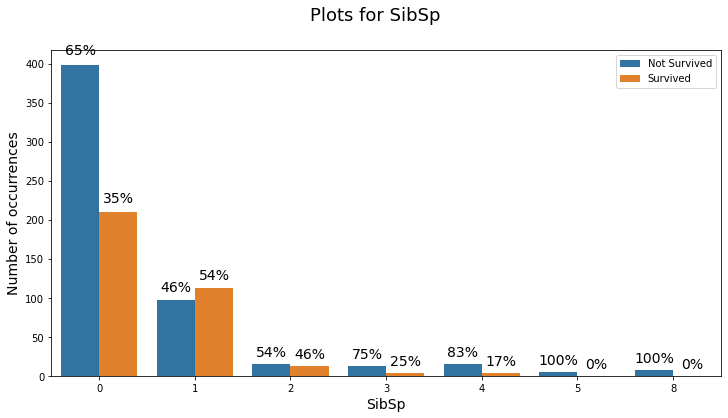

In [49]:
category_plot("SibSp", train_df)

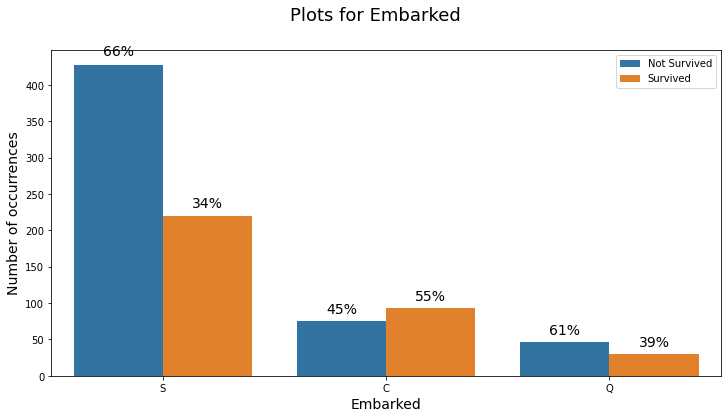

In [50]:
category_plot("Embarked", train_df)

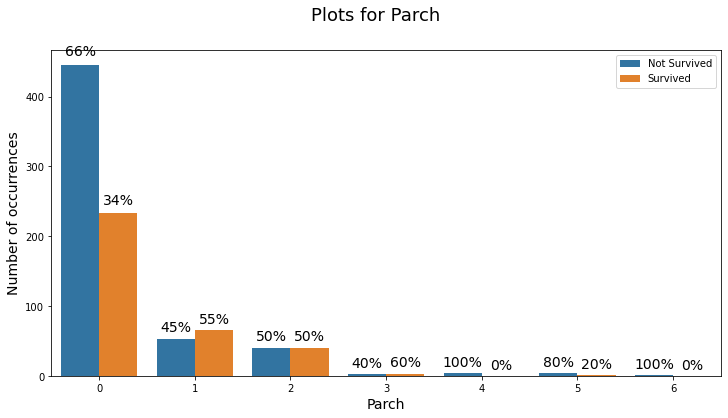

In [51]:
category_plot("Parch", train_df)

In [52]:
#numeric 变量与目标变量


In [53]:
def numeric_plot( column, train_data):
    fig = plt.figure(figsize=(12,8))# Figure initiation
    
    # Distribution per Survived / Not Survived Value
    # Not Survived hist
    sns.distplot(train_data.loc[train_data.Survived==0, column].dropna(),
                 color='red', label='Not Survived', ax=plt.subplot(211));
    # Survived hist
    sns.distplot(train_data.loc[train_data.Survived==1, column].dropna(),
                 color='blue', label='Survived', ax=plt.subplot(211));
    # Adding Legend
    plt.legend(loc='best')
    # X-axis Label
    plt.xlabel(column, fontsize=14);
    # Y-axis Label
    plt.ylabel('Density per Survived / Not Survived Value', fontsize=14);
    
    # Boxplot of Column per Survived / Not Survived Value
    sns.boxplot(x="target_name", y=column, data=train_data, ax=plt.subplot(212));
    # X-axis Label
    plt.xlabel('Survived or Not Survived?', fontsize=14);
    # Y-axis Label
    plt.ylabel(column, fontsize=14);
    # Printing Chart
    plt.show()

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-53-9e735cee9531>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  color='blue', label='Survived', ax=plt.subplot(211));
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simila

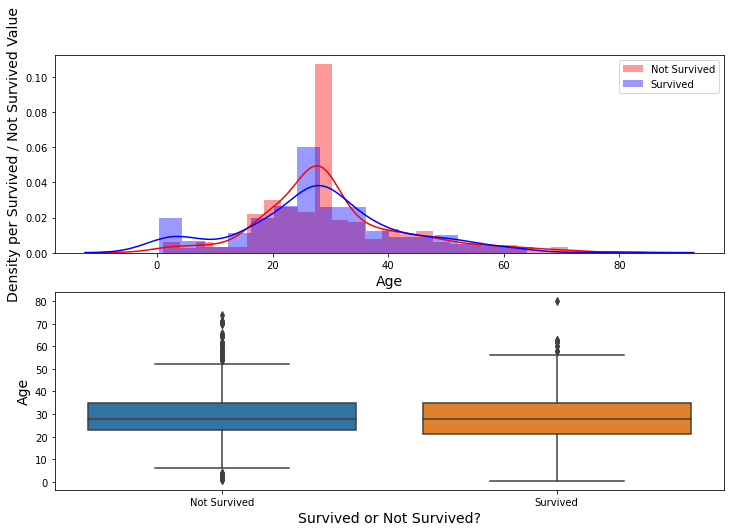

In [54]:
numeric_plot("Age", train_df)

C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-53-9e735cee9531>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  color='blue', label='Survived', ax=plt.subplot(211));
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simila

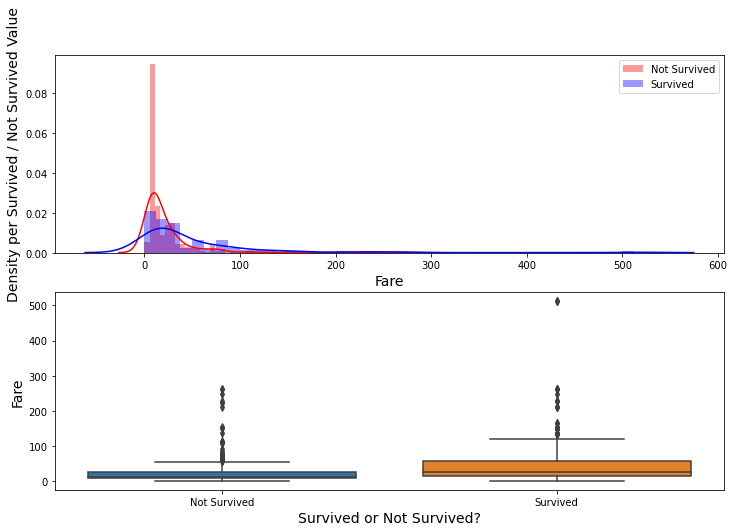

In [55]:
numeric_plot("Fare", train_df)

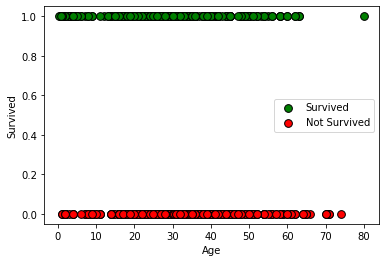

In [56]:
df_Survived = train_df[train_df.Survived == 1]
df_Not_Survived = train_df[train_df.Survived == 0]
x_Survived = df_Survived["Age"]
y_survived = df_Survived["Survived"]
x_Not_Survived = df_Not_Survived["Age"]
y_Not_Survived = df_Not_Survived["Survived"]

plt.scatter(x_Survived, y_survived, 60, edgecolors='black', c='green', label = 'Survived')
plt.scatter(x_Not_Survived, y_Not_Survived, 60, edgecolors='black', c='red', label = 'Not Survived')
plt.xlabel("Age")
plt.ylabel("Survived")
plt.legend()
plt.show()

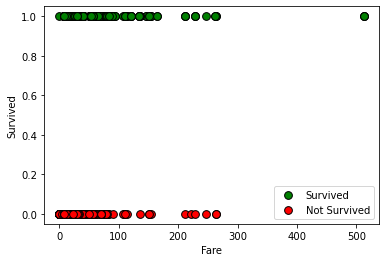

In [57]:
df_Survived = train_df[train_df.Survived == 1]
df_Not_Survived = train_df[train_df.Survived == 0]
x_Survived = df_Survived["Fare"]
y_survived = df_Survived["Survived"]
x_Not_Survived = df_Not_Survived["Fare"]
y_Not_Survived = df_Not_Survived["Survived"]

plt.scatter(x_Survived, y_survived, 60, edgecolors='black', c='green', label = 'Survived')
plt.scatter(x_Not_Survived, y_Not_Survived, 60, edgecolors='black', c='red', label = 'Not Survived')
plt.xlabel("Fare")
plt.ylabel("Survived")
plt.legend()
plt.show()

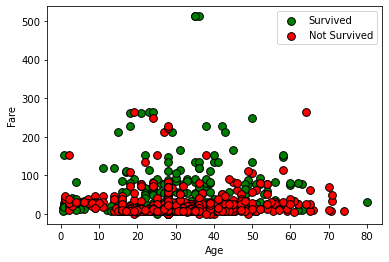

In [58]:
# numeric  scatter
df_Survived = train_df[train_df.Survived == 1]
df_Not_Survived = train_df[train_df.Survived == 0]

x_Survived = df_Survived["Age"]
y_survived = df_Survived["Fare"]
x_Not_Survived = df_Not_Survived["Age"]
y_Not_Survived = df_Not_Survived["Fare"]


plt.scatter(x_Survived, y_survived, 60, edgecolors='black', c='green', label = 'Survived')
plt.scatter(x_Not_Survived, y_Not_Survived, 60, edgecolors='black', c='red', label = 'Not Survived')

plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend()
plt.show()

In [59]:
#modeling
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare2,Sex2,Embarked2,Age2,Age_min_max_scale,Age_std_scale,target_name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,7.2500,0,0,1,0.271174,-0.565736,Not Survived
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,65.6344,1,1,1,0.472229,0.663861,Survived
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.9250,1,0,1,0.321438,-0.258337,Survived
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,53.1000,1,0,1,0.434531,0.433312,Survived
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.0500,0,0,1,0.434531,0.433312,Not Survived


In [60]:
train_df2 = train_df[["Survived","Pclass","Sex2","SibSp","Parch", "Embarked2","Age","Fare"]]
train_df2.head()

,Survived,Pclass,Sex2,SibSp,Parch,Embarked2,Age,Fare
0,0,3,0,1,0,0,22.0,7.2500
1,1,1,1,1,0,1,38.0,71.2833
2,1,3,1,0,0,0,26.0,7.9250
3,1,1,1,1,0,0,35.0,53.1000
4,0,3,0,0,0,0,35.0,8.0500


In [61]:
#add
train_df3 = train_df.drop(['PassengerId','Name','Sex', 'Ticket', 'Cabin','Embarked','Fare2','Age2','Age_min_max_scale','Age_std_scale','target_name'], axis=1,inplace=False)
train_df3.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex2,Embarked2
0,0,3,22.0,1,0,7.2500,0,0
1,1,1,38.0,1,0,71.2833,1,1
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,0


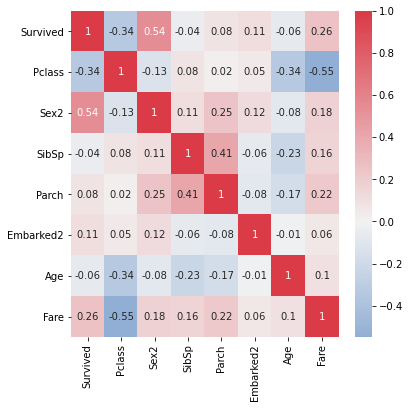

In [62]:
cor_matrix = train_df2.corr().round(2)
# Plotting heatmap 
fig = plt.figure(figsize=(6,6));
sns.heatmap(cor_matrix, annot=True, center=0, cmap = sns.diverging_palette(250, 10, as_cmap=True), ax=plt.subplot(111));
plt.show()

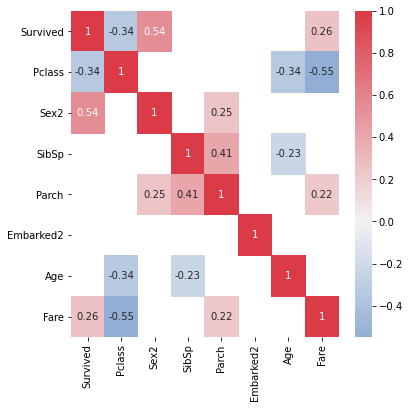

In [63]:
cor_matrix = train_df2.corr().round(2)
# Plotting heatmap 
fig = plt.figure(figsize=(6,6));
kot = cor_matrix[abs(cor_matrix)>=.20]
sns.heatmap(kot, annot=True, center=0, cmap = sns.diverging_palette(250, 10, as_cmap=True), ax=plt.subplot(111));
plt.show()



In [64]:
print(train_df2.size)

7128


In [65]:
train_df2 = train_df2.dropna()
print(train_df2.size)

7128


In [66]:
X_train = train_df2.drop("Survived",axis=1)
Y_train = train_df2["Survived"]

In [67]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X_train, Y_train)
logreg.score(X_train, Y_train)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:937: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8013468013468014

In [68]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train, Y_train)
decision_tree.score(X_train, Y_train)

0.9797979797979798

In [69]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier() 

knn.fit(X_train,Y_train)
knn.score(X_train, Y_train)

0.8035914702581369